Import needed functions and libraries.

In [1]:
from toolkit.testing import *
from toolkit.file_operations import mnist_to_nparray#, save_keras, load_keras
from toolkit.noise import display_digit
from keras.utils import np_utils
from time import time

def reshape_data(x, y):
	x = x.reshape(x.shape[0], 28, 28, 1)
	y = np_utils.to_categorical(y, 10)
	return x, y

Using TensorFlow backend.


Augment data by adding 10% pixel noise. Then add the augmented data to the original data and train the model on the extended dataset to see if the performance has improved.

In [2]:
[x,y,_] = mnist_to_nparray('data/', 'train', 'test', False)
#[x,y,_] = mnist_to_nparray('data/', 'train50', 'test50', False)

n = int(42000*.9)
#train = np.concatenate((x[:n,:], x10[:n,:]), axis=0)
#trainlabels = np.concatenate((y[:n],y10[:n]))

train = x[:n,:]
trainlabels = y[:n]

validation = x[n:,:]
validationlabels = y[n:]

train, trainlabels = reshape_data(train, trainlabels)
validation, validationlabels = reshape_data(validation, validationlabels)

In [ ]:
[x,y,_] = mnist_to_nparray('data/', 'train', 'test', False)
#[x,y,_] = mnist_to_nparray('data/', 'train50', 'test50', False)

n = int(42000*.9)
#train = np.concatenate((x[:n,:], x10[:n,:]), axis=0)
#trainlabels = np.concatenate((y[:n],y10[:n]))

train = x[:n,:]
trainlabels = y[:n]

validation = x[n:,:]
validationlabels = y[n:]

train, trainlabels = reshape_data(train, trainlabels)
validation, validationlabels = reshape_data(validation, validationlabels)

In [3]:
model = train_simges_net(train,trainlabels,40)
pred = categorical_to_class(model.predict(validation))
accuracy(pred, categorical_to_class(validationlabels), '40 epochs, no noise, no augmentation:' )

Epoch 1/40
37800/37800 [==============================] - 8s 215us/step - loss: 2.1013
Epoch 2/40
37800/37800 [==============================] - 6s 149us/step - loss: 0.1586
Epoch 3/40
37800/37800 [==============================] - 6s 154us/step - loss: 0.1213
Epoch 4/40
37800/37800 [==============================] - 5s 145us/step - loss: 0.1066
Epoch 5/40
37800/37800 [==============================] - 6s 146us/step - loss: 0.0925
Epoch 6/40
37800/37800 [==============================] - 6s 152us/step - loss: 0.0792
Epoch 7/40
37800/37800 [==============================] - 5s 145us/step - loss: 0.0745
Epoch 8/40
37800/37800 [==============================] - 6s 146us/step - loss: 0.0717
Epoch 9/40
37800/37800 [==============================] - 5s 144us/step - loss: 0.0629
Epoch 10/40
37800/37800 [==============================] - 5s 145us/step - loss: 0.0623
Epoch 11/40
37800/37800 [==============================] - 6s 146us/step - loss: 0.0597
Epoch 12/40
37800/37800 [================

In [4]:
model = train_conv_net(train,trainlabels,17)
pred = categorical_to_class(model.predict(validation))
accuracy(pred, categorical_to_class(validationlabels), '17 epochs, no noise, no augmentation:' )

C:\Users\Joan\Desktop\Uni\Machine Learning in Practice\github\MLIP\progress\Joan\toolkit\testing.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  model.add(Convolution2D(32, 3, 3, input_shape=(28,28,1)))
C:\Users\Joan\Desktop\Uni\Machine Learning in Practice\github\MLIP\progress\Joan\toolkit\testing.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  model.add(Convolution2D(32, 3, 3))


Epoch 1/17
37800/37800 [==============================] - 15s 391us/step - loss: 0.2139
Epoch 2/17
37800/37800 [==============================] - 14s 374us/step - loss: 0.1003
Epoch 3/17
37800/37800 [==============================] - 14s 371us/step - loss: 0.0804
Epoch 4/17
37800/37800 [==============================] - 14s 375us/step - loss: 0.0693
Epoch 5/17
37800/37800 [==============================] - 14s 373us/step - loss: 0.0602
Epoch 6/17
37800/37800 [==============================] - 14s 373us/step - loss: 0.0549
Epoch 7/17
37800/37800 [==============================] - 14s 376us/step - loss: 0.0491
Epoch 8/17
37800/37800 [==============================] - 14s 373us/step - loss: 0.0433
Epoch 9/17
37800/37800 [==============================] - 14s 371us/step - loss: 0.0427
Epoch 10/17
37800/37800 [==============================] - 14s 374us/step - loss: 0.0370
Epoch 11/17
37800/37800 [==============================] - 14s 372us/step - loss: 0.0370
Epoch 12/17
37800/37800 [=====

In [3]:
pred = categorical_to_class(model.predict(validation))
accuracy(pred, categorical_to_class(validationlabels), 'Augmented with 10% pixel noise.')

NameError: name 'model' is not defined

Train model on original data to check performance.

In [7]:
start = time()
modelx = train_conv_net(train1,trainlabels1,10,fault_focus=False)
predx = categorical_to_class(modelx.predict(validation1))
accuracy(predx, categorical_to_class(validationlabels1), 'Normal data')
print(time()-start)

C:\Users\Joan\Desktop\Uni\Machine Learning in Practice\github\MLIP\progress\Joan\toolkit\testing.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  model.add(Convolution2D(32, 3, 3, input_shape=(28,28,1)))
C:\Users\Joan\Desktop\Uni\Machine Learning in Practice\github\MLIP\progress\Joan\toolkit\testing.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  model.add(Convolution2D(32, 3, 3))


Epoch 1/10
37800/37800 [==============================] - 16s 429us/step - loss: 0.4942
Epoch 2/10
37800/37800 [==============================] - 15s 409us/step - loss: 0.2351
Epoch 3/10
37800/37800 [==============================] - 15s 409us/step - loss: 0.1700
Epoch 4/10
37800/37800 [==============================] - 16s 412us/step - loss: 0.1316
Epoch 5/10
37800/37800 [==============================] - 15s 402us/step - loss: 0.1095
Epoch 6/10
37800/37800 [==============================] - 15s 404us/step - loss: 0.0951
Epoch 7/10
37800/37800 [==============================] - 15s 405us/step - loss: 0.0814
Epoch 8/10
37800/37800 [==============================] - 15s 407us/step - loss: 0.0738
Epoch 9/10
37800/37800 [==============================] - 16s 411us/step - loss: 0.0644
Epoch 10/10
37800/37800 [==============================] - 18s 472us/step - loss: 0.0607
Normal data accuracy:	0.9897619047619047
158.76554775238037


In [3]:
start = time()
modely= train_conv_net(train1,trainlabels1,10,fault_focus=True)
predy = categorical_to_class(modely.predict(validation1))
accuracy(predy, categorical_to_class(validationlabels1), 'Normal data')
print(time()-start)

C:\Users\Joan\Desktop\Uni\Machine Learning in Practice\github\MLIP\progress\Joan\toolkit\testing.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  model.add(Convolution2D(32, 3, 3, input_shape=(28,28,1)))
C:\Users\Joan\Desktop\Uni\Machine Learning in Practice\github\MLIP\progress\Joan\toolkit\testing.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  model.add(Convolution2D(32, 3, 3))


Epoch 1/1
37800/37800 [==============================] - 17s 445us/step - loss: 0.4985
Epoch 1/1
37800/37800 [==============================] - 15s 407us/step - loss: 0.2494
Epoch 1/1
37800/37800 [==============================] - 15s 406us/step - loss: 0.1833
Epoch 1/1
37800/37800 [==============================] - 15s 407us/step - loss: 0.1447
Epoch 1/1
37800/37800 [==============================] - 15s 399us/step - loss: 0.1202
Epoch 1/1
37800/37800 [==============================] - 15s 408us/step - loss: 0.1028
Epoch 1/1
37800/37800 [==============================] - 15s 405us/step - loss: 0.0895
Epoch 1/1
37800/37800 [==============================] - 15s 405us/step - loss: 0.0784
Epoch 1/1
37800/37800 [==============================] - 15s 405us/step - loss: 0.0693
Epoch 1/1
37800/37800 [==============================] - 15s 400us/step - loss: 0.0632
Normal data accuracy:	0.991904761904762
189.38157725334167


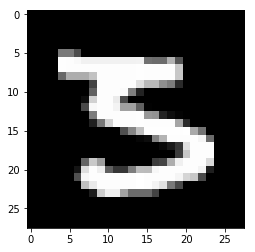

5
3


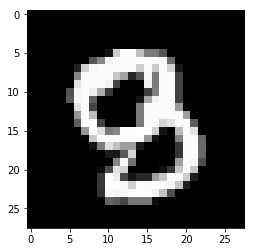

8
9


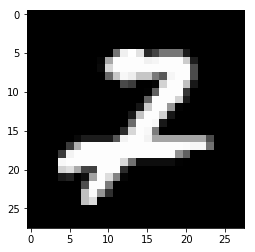

2
7


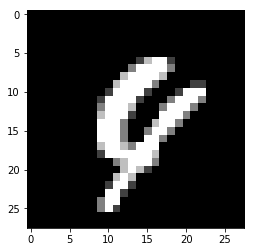

9
4


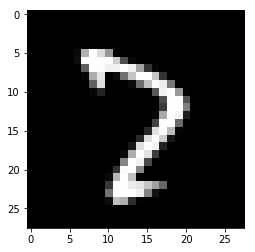

2
7


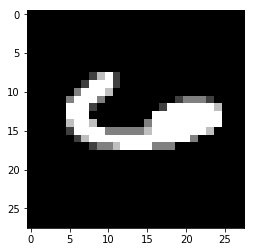

4
6


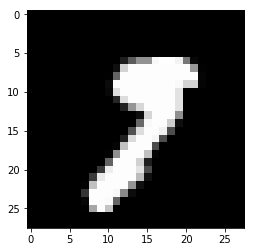

7
9


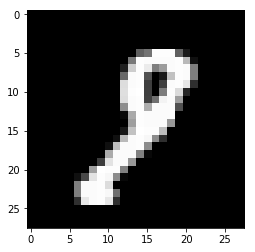

8
9


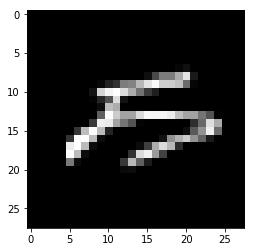

7
5


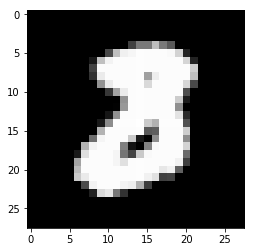

2
8


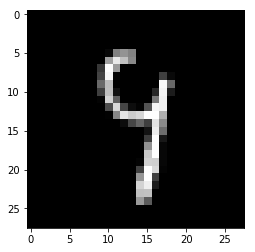

4
9


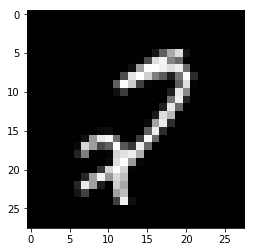

7
2


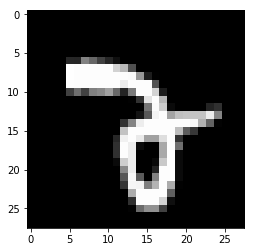

7
2


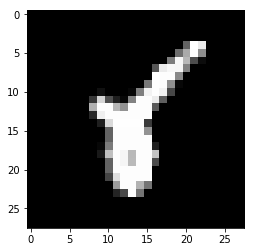

4
8


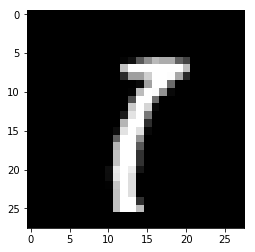

7
1


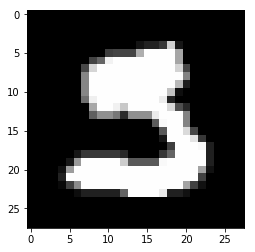

3
5


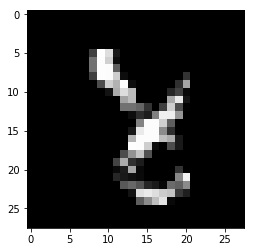

2
8


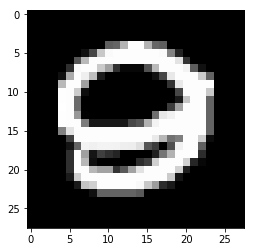

8
9


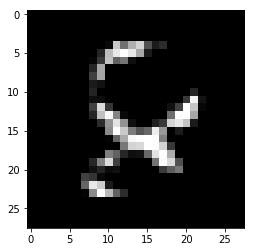

3
8


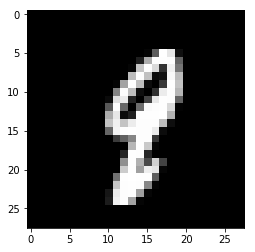

8
9


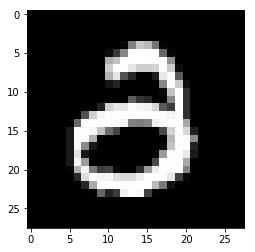

3
2


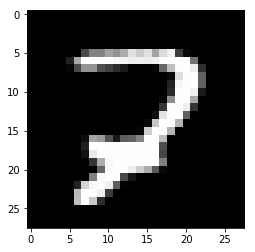

3
7


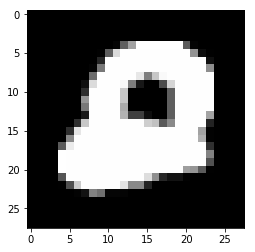

0
2


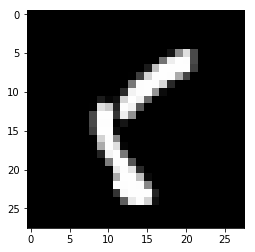

6
5


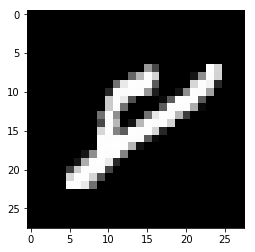

4
8


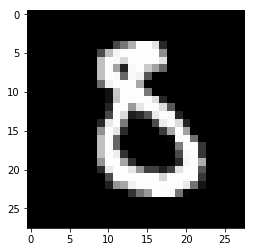

6
8


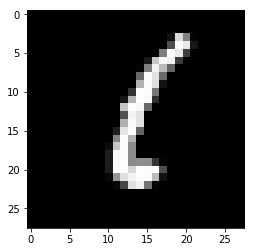

6
1


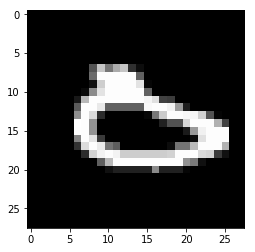

6
0


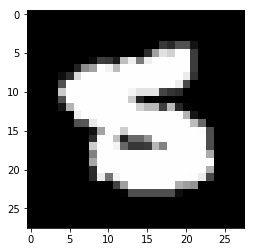

8
5


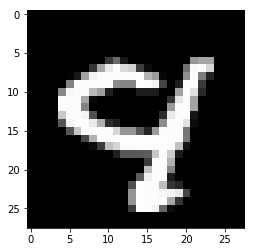

9
4


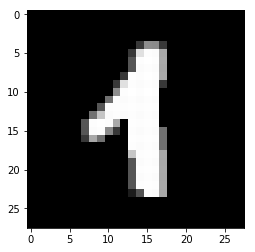

1
4


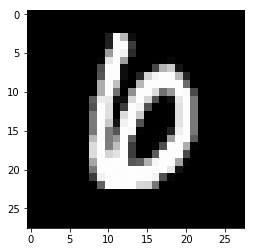

0
6


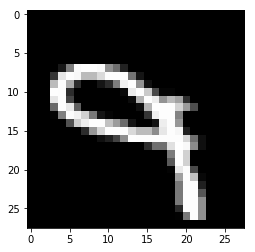

8
9


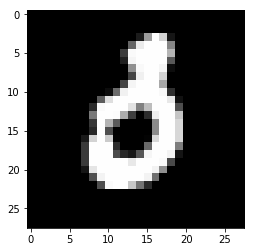

0
3


In [4]:
labs = categorical_to_class(validationlabels1)
for i,p in enumerate(predy):
    if not p == labs[i]:
        display_digit(np.take(validation1,[i],axis=0))
        print(p)
        print(labs[i])

In [6]:
modelx.ev
modely.evaluate(train1, trainlabels1)

NameError: name 'modelx' is not defined

In [2]:
[x1,y1,_] = mnist_to_nparray('data/', 'train', 'test', False)

n1 = int(42000*.9)
train1 = x1[:n1,:]
trainlabels1 = y1[:n1]

validation1 = x1[n1:,:]
validationlabels1 = y1[n1:]

train1, trainlabels1 = reshape_data(train1, trainlabels1)
validation1, validationlabels1 = reshape_data(validation1, validationlabels1)

In [6]:
model1 = train_conv_net(train1,trainlabels1,40)

C:\Users\Joan\Desktop\Uni\Machine Learning in Practice\github\MLIP\progress\Joan\toolkit\testing.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  model.add(Convolution2D(32, 3, 3, input_shape=(28,28,1)))
C:\Users\Joan\Desktop\Uni\Machine Learning in Practice\github\MLIP\progress\Joan\toolkit\testing.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  model.add(Convolution2D(32, 3, 3))


Epoch 1/40
37800/37800 [==============================] - 18s 476us/step - loss: 0.4980
Epoch 2/40
37800/37800 [==============================] - 16s 412us/step - loss: 0.2421
Epoch 3/40
37800/37800 [==============================] - 16s 415us/step - loss: 0.1743
Epoch 4/40
37800/37800 [==============================] - 16s 414us/step - loss: 0.1412
Epoch 5/40
37800/37800 [==============================] - 16s 414us/step - loss: 0.1142
Epoch 6/40
37800/37800 [==============================] - 16s 414us/step - loss: 0.1031
Epoch 7/40
37800/37800 [==============================] - 15s 410us/step - loss: 0.0946
Epoch 8/40
37800/37800 [==============================] - 15s 410us/step - loss: 0.0752
Epoch 9/40
37800/37800 [==============================] - 16s 412us/step - loss: 0.0683
Epoch 10/40
37800/37800 [==============================] - 15s 408us/step - loss: 0.0621
Epoch 11/40
37800/37800 [==============================] - 15s 407us/step - loss: 0.0570
Epoch 12/40
37800/37800 [=====

In [ ]:
labs = categorical_to_class(validationlabels1)
for i,p in enumerate(pred1):
    if not p == labs[i]:
        display_digit(np.take(validation1,[i],axis=0))
        print(p)
        print(labs[i])

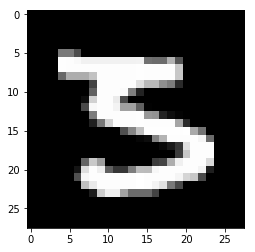

5
3


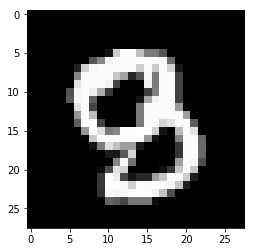

8
9


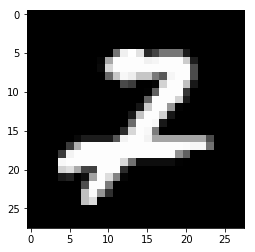

2
7


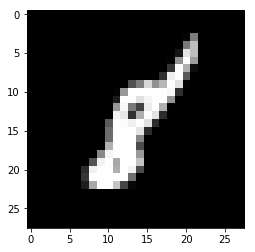

1
8


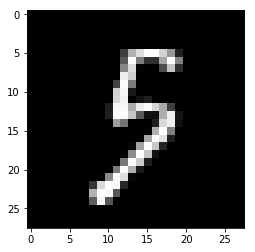

9
5


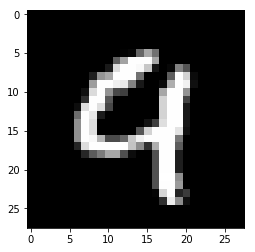

4
9


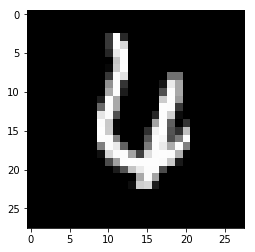

6
4


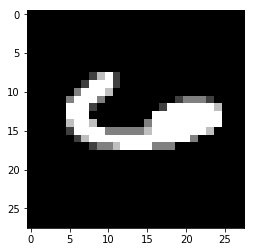

4
6


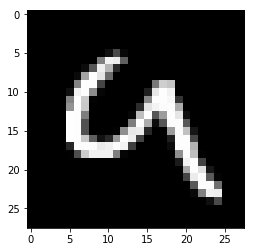

4
9


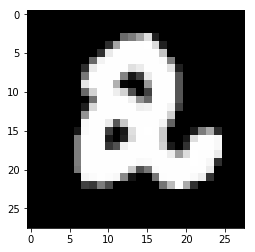

8
2


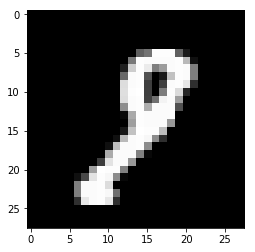

8
9


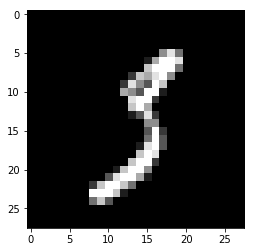

5
3


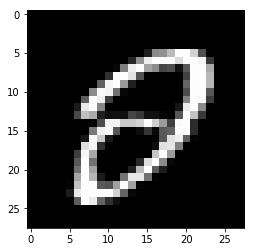

8
2


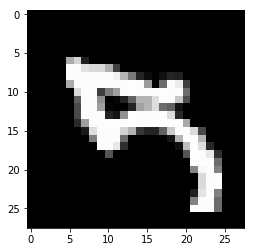

8
5


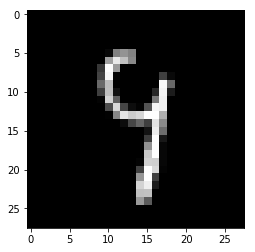

4
9


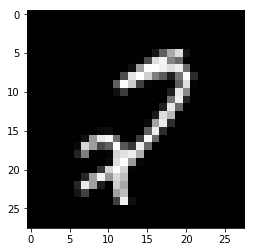

7
2


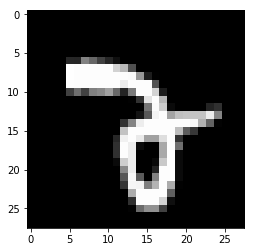

7
2


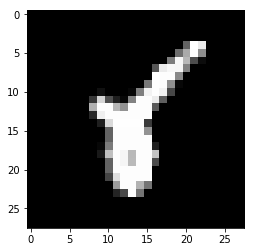

1
8


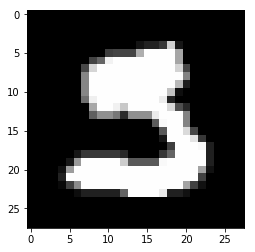

3
5


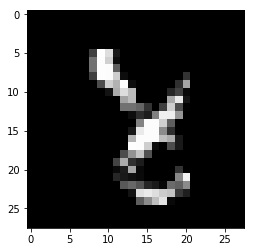

2
8


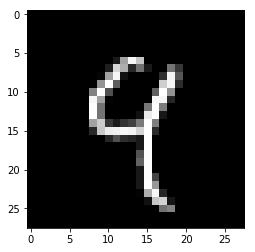

4
9


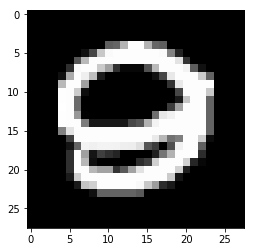

8
9


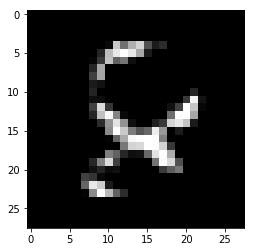

3
8


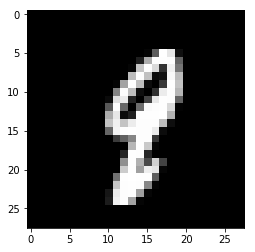

8
9


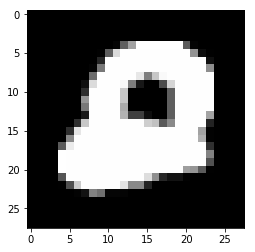

0
2


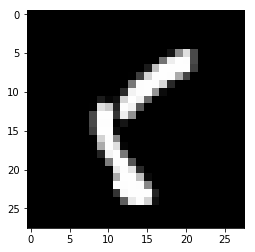

6
5


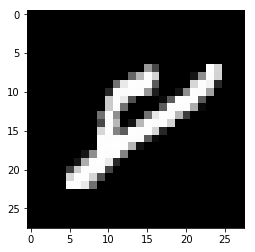

4
8


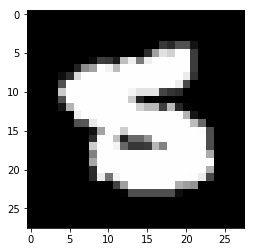

8
5


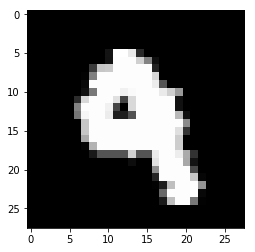

4
9


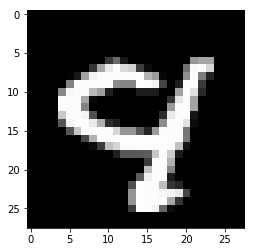

9
4


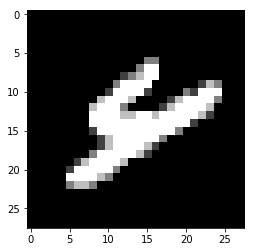

8
4


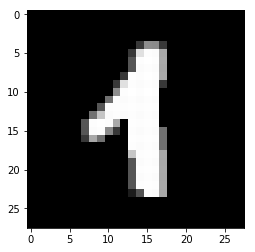

1
4


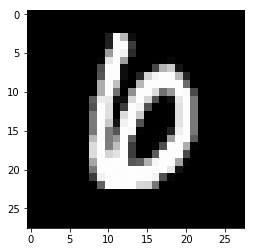

0
6


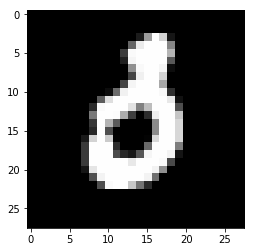

0
3


In [25]:
labs = categorical_to_class(validationlabels1)
for i,p in enumerate(pred1):
    if not p == labs[i]:
        display_digit(np.take(validation1,[i],axis=0))
        print(p)
        print(labs[i])

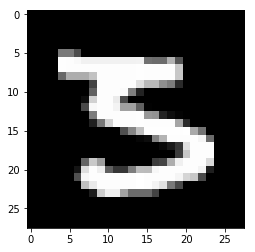

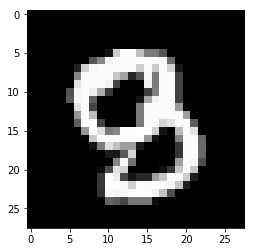

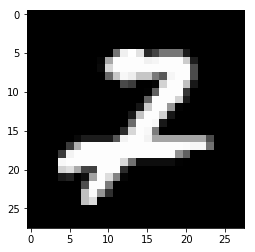

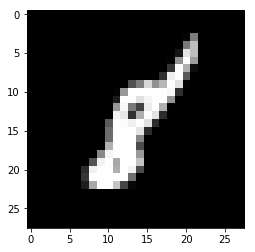

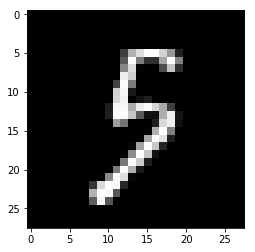

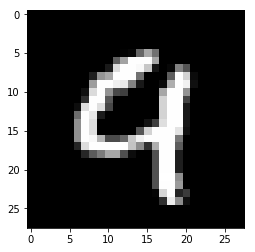

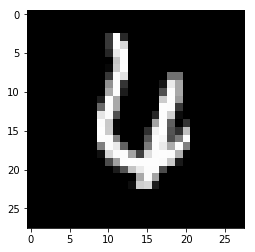

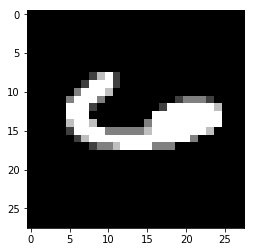

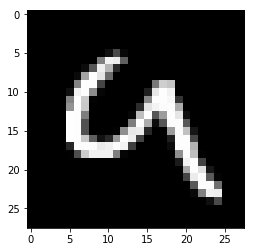

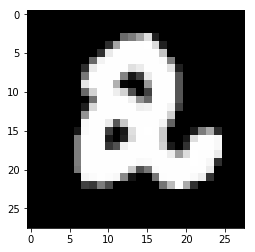

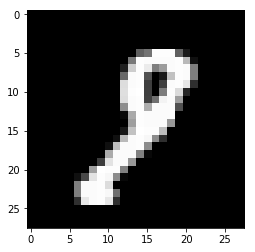

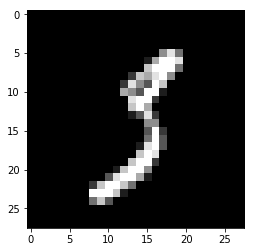

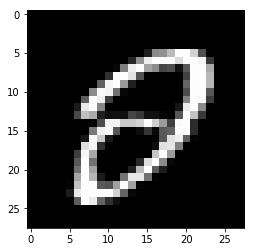

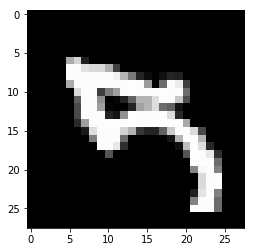

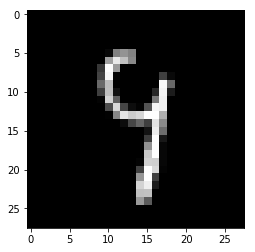

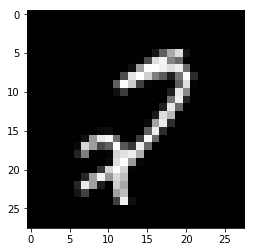

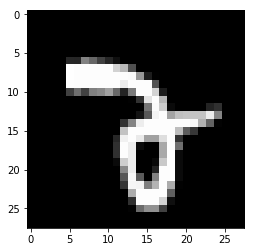

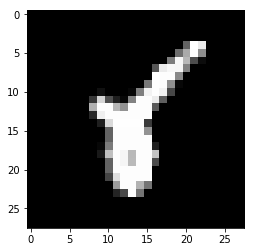

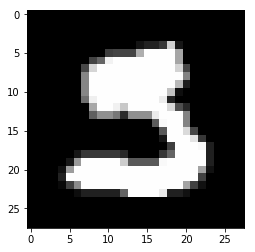

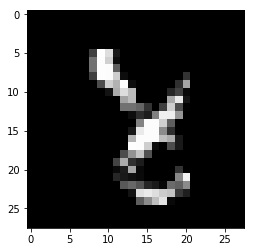

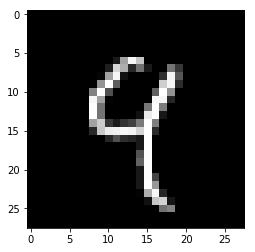

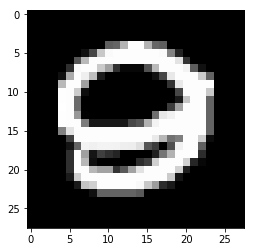

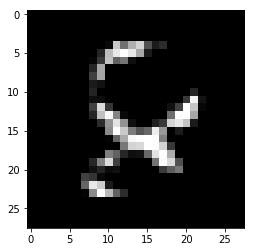

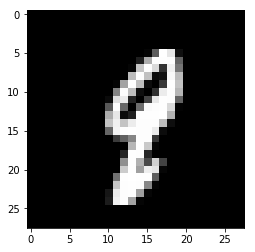

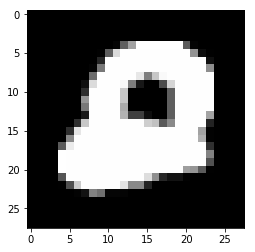

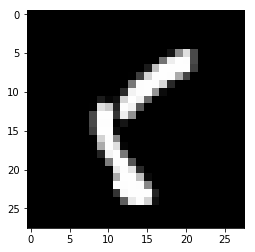

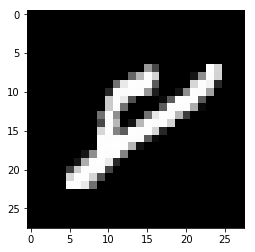

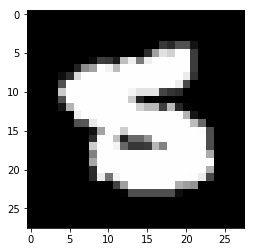

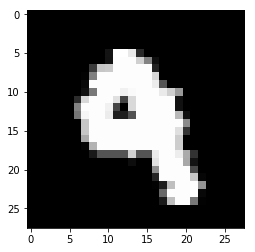

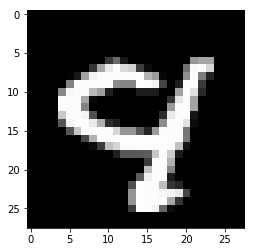

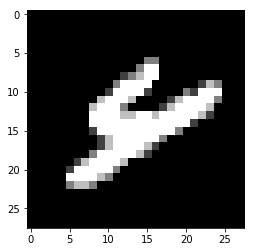

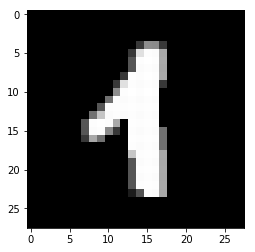

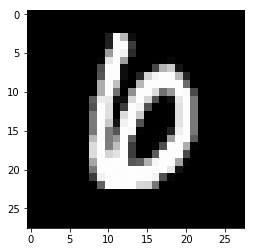

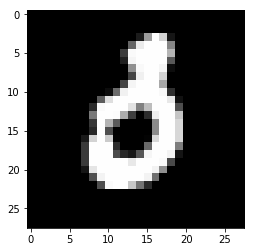

In [21]:
for mistake in missed:
    display_digit(mistake)
    
        

Use for writing results.

In [23]:
pred = categorical_to_class(model.predict(z))

In [29]:
from toolkit.file_operations import write_results

In [31]:
write_results(pred, 'results/', '100epochWOW')